In [25]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = \
        imdb.load_data(num_words=10000)



In [26]:
import numpy as np


In [27]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))

    for i, seq in enumerate(sequences):
        results[i, seq] = 1.
    return results


In [28]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)


In [29]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [30]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['accuracy'])


In [31]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',metrics=['accuracy'])

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


In [32]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [33]:


history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val ))


Epoch 1/20
30/30 [==============================] - 1s 42ms/step - loss: 0.5306 - binary_accuracy: 0.7746 - val_loss: 0.4133 - val_binary_accuracy: 0.8610
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3255 - binary_accuracy: 0.8990 - val_loss: 0.3153 - val_binary_accuracy: 0.8894
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2380 - binary_accuracy: 0.9253 - val_loss: 0.2824 - val_binary_accuracy: 0.8919
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1834 - binary_accuracy: 0.9400 - val_loss: 0.2762 - val_binary_accuracy: 0.8904
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1509 - binary_accuracy: 0.9523 - val_loss: 0.2786 - val_binary_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1234 - binary_accuracy: 0.9613 - val_loss: 0.2888 - val_binary_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - los

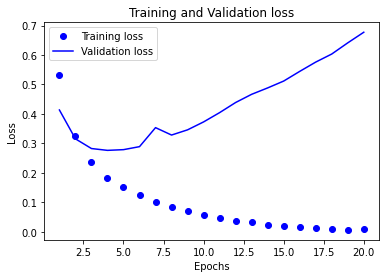

In [34]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) +1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [35]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


KeyError: 'acc'

<Figure size 432x288 with 0 Axes>

In [11]:
history_dict


{'loss': [0.6931636333465576,
  0.6931490898132324,
  0.6931394338607788,
  0.6931420564651489,
  0.6931347250938416,
  0.6931296586990356,
  0.6931333541870117,
  0.6931328177452087,
  0.6931363940238953,
  0.6931291818618774,
  0.6931347250938416,
  0.6931304931640625,
  0.6931349039077759,
  0.6931329369544983,
  0.6931329965591431,
  0.6931362152099609,
  0.6931298971176147,
  0.6931333541870117,
  0.6931323409080505,
  0.6931314468383789],
 'acc': [0.49566665291786194,
  0.5015333294868469,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404],
 'val_loss': [0.6931582093238831,
  0.693168044090271,
  0.6931761503219604,
  0.6932087540626526,
  0

In [7]:
dd = ['a', 'b','c','d','e','f','j','g','g']
ee = [1,2,3,4,5,6,7,7,7,7,8,0]

In [8]:
vectorize_sequences(ee)

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
re = np.zeros(len(dd, 100)
for i, j in enumerate(dd):
    re[i,j] = 1.

SyntaxError: invalid syntax (<ipython-input-15-8f9139b09ab7>, line 2)

In [16]:
re

NameError: name 're' is not defined

In [18]:
re = np.zeros((len(dd), 1000))

In [19]:
re

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
re[0,0] = 1

In [22]:
re[1,1] = 1

In [23]:
re

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])